## Set WD

In [1]:
import os
os.chdir("/home/sgf2/DBMI_server/adversarial_attacks/cxr/")

In [2]:
import scipy.stats as st
import keras 
from sklearn import metrics
from sklearn.metrics import auc

def mean_ci(x):
    mn = np.mean(x)
    ci = st.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=st.sem(x))
    return (mn, ci[0], ci[1])

def printResults(model_preds, y_test):
    acc = np.mean(np.round(model_preds)[:,0] == y_test[:,0])
    print('Test accuracy: %0.4f' % acc)

    fpr, tpr, thresholds = metrics.roc_curve(y_test[:,1], model_preds[:,1])
    auc_score = auc(fpr,tpr)
    print('AUC: %0.4f' % auc_score)

    conf = mean_ci(np.max(model_preds, axis = 1))
    print('Avg. Confidence: ' + '{0:.6f} '.format(conf[0]) + \
          '({0:.6f}'.format(conf[1]) + ' - {0:.6f})'.format(conf[2]))

/home/anaconda/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Set up

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
from craft_attack_patch import *

Using TensorFlow backend.


# Adversarial Patch Attack

## Train Patches

In [2]:
# Hyperparameters
epochs = 7
learning_rate = 5.0

# Load the models
resnet1 = ModelContainer('resnet1')
resnet2 = ModelContainer('resnet2')

# White Box
model = resnet1

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, use
    tf.py_function, which takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.cast instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
in

In [ ]:
# Target 0
train(model, target_label=0, epochs=epochs, learning_rate=learning_rate)
file_name = './patches/resnet1_patch_target0_epoch' + str(epochs) + '_wb.npy'
np.save(file_name, model.patch())

# Target 1
train(model, target_label=1, epochs=epochs, learning_rate=learning_rate)
file_name = './patches/resnet1_patch_target1_epoch' + str(epochs) + '_wb.npy'
np.save(file_name, model.patch())

# Black Box
model = resnet2

# Target 0
train(model, target_label=0, epochs=epochs, learning_rate=learning_rate)
file_name = './patches/resnet1_patch_target0_epoch' + str(epochs) + '_bb.npy'
np.save(file_name, model.patch())

# Target 1
train(model, target_label=1, epochs=epochs, learning_rate=learning_rate)
file_name = './patches/resnet1_patch_target1_epoch' + str(epochs) + '_bb.npy'
np.save(file_name, model.patch())

## Display Results

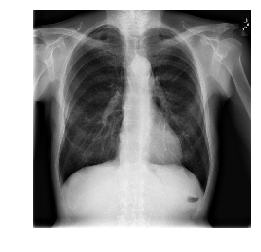

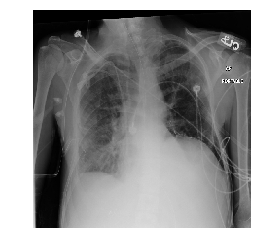

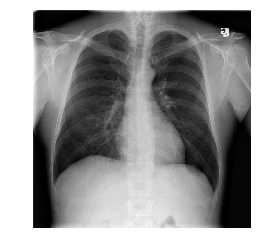

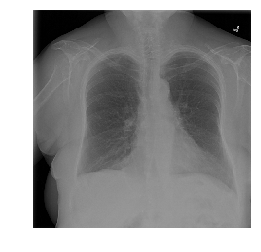

In [4]:
################################# THIS IS THE ONLY CELL THAT WAS ADDED #############
# Pick the images to show (attack). Here I randomly chose 2 from each class
show(image_loader.X_test[3]) # label 0
show(image_loader.X_test[200]) # label 0 
show(image_loader.X_test[401]) # label 1
show(image_loader.X_test[453]) # label 1

In [5]:
################################# THIS IS THE ONLY CELL THAT WAS MODIFIED #############
epochs = 7
# Load the models
resnet1 = ModelContainer('resnet1')
resnet2 = ModelContainer('resnet2')

# Loading the patch file 
resnet1_patch_target1_wb = np.load('./patches/resnet1_patch_target1_epoch' + str(epochs) + '_wb.npy')
resnet1_patch_target0_wb = np.load('./patches/resnet1_patch_target0_epoch' + str(epochs) + '_wb.npy')

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Finished loading resnet1, took 18s
Finished loading resnet2, took 19s


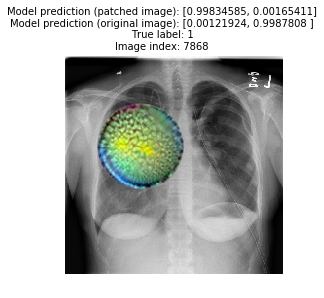

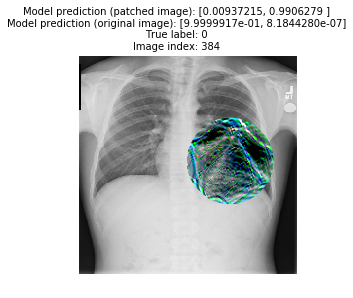

White Box:
Test accuracy: 0.0001
AUC: 0.0000
Avg. Confidence: 0.987728 (0.987240 - 0.988215)


In [12]:
# Indices of images to show (use n_show=0 when using show_indices feature)
show_indices0 = [7868] # attack with target label 0
show_indices1 = [384]

# Apply
scale = 0.4
probs_patched_images, probs_original_images,indices, true_labels, winp = attack_combined(resnet1,patch_for_0=resnet1_patch_target0_wb,
                                                                         patch_for_1=resnet1_patch_target1_wb,
                                                                         n_show=0, scale=scale,
                                                                         show_indices0=show_indices0,
                                                                         show_indices1=show_indices1,
                                                                         predict_original=False
                                                                                        )


# Print
print("White Box:")
printResults(probs_patched_images, keras.utils.to_categorical(true_labels))

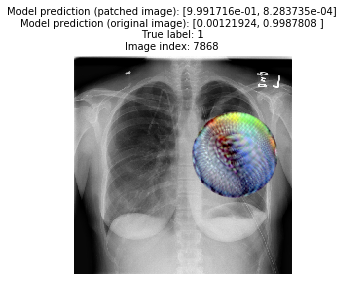

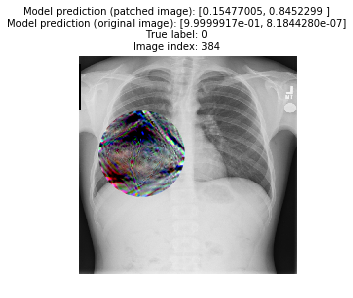


Black Box:
Test accuracy: 0.0967
AUC: 0.0038
Avg. Confidence: 0.832614 (0.829576 - 0.835652)


In [13]:
# Loading the patch file 
resnet1_patch_target1_bb = np.load('./patches/resnet1_patch_target1_epoch7_bb.npy')
resnet1_patch_target0_bb = np.load('./patches/resnet1_patch_target0_epoch7_bb.npy')

# Apply
probs_patched_images, probs_original_images, indices, true_labels, winp = attack_combined(resnet1,patch_for_0=resnet1_patch_target0_bb,
                                                                         patch_for_1=resnet1_patch_target1_bb,
                                                                         n_show=0, scale=scale,
                                                                         show_indices0=show_indices0,
                                                                         show_indices1=show_indices1,
                                                                         predict_original=False
                                                                                        )
# Print
print("\nBlack Box:")
printResults(probs_patched_images, keras.utils.to_categorical(true_labels))

# Photoshop Patch Attacks

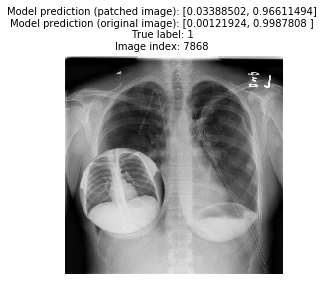

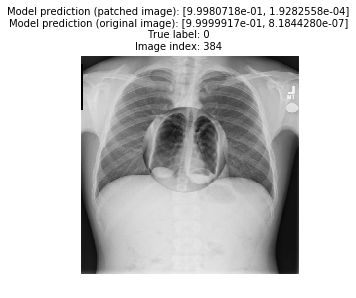

Test accuracy: 0.9205
AUC: 0.5386
Avg. Confidence: 0.957622 (0.956047 - 0.959198)


In [15]:
# Combined attack with mole-patches
file_name0 = './patches/natural_patch_min_p.npy'
file_name1 = './patches/natural_patch_max_p.npy'
mole_patch0 = np.load(file_name0)
mole_patch1 = np.load(file_name1)
scale = 0.4
probs_patched_images, probs_original_images, indices, true_labels, winp = attack_combined(resnet1,patch_for_0=mole_patch0,
                                                                         patch_for_1=mole_patch1,
                                                                         n_show=0, scale=scale,
                                                                         show_indices0=show_indices0,
                                                                         show_indices1=show_indices1,
                                                                         predict_original=False
                                                                                        )
printResults(probs_patched_images, keras.utils.to_categorical(true_labels))

Test accuracy: 0.0137
AUC: 0.0027
Avg. Confidence: 0.963693 (0.956826 - 0.970560)
